In [2]:
import numpy as np

# Jouer avec des points

On considère $Y$ les points sur la droite aux valeurs  1, 3, 7, 2 (c'est juste un vecteur).

In [3]:
Ｙ=np.array([1,3,7,2])
Y

array([1, 3, 7, 2])

On va calculer toute les différences entre ces valeurs. On construit un matrice `M` telle que `M[i,j] = Y[i] - Y[j]` et `i` et `j` sont deux indices pour tous les identifiants de points possibles. Pour cela, on peut utiliser le broadcasting... 

On constuit `Y - Y.T`, mais il faut transformer le vecteurs 1d `Y` en matrices `a` et `b` de taille (4, 1) et (1, 4)

In [4]:
a = Y.reshape(4,1)
b = Y.reshape(4,1).T
a,b

(array([[1],
        [3],
        [7],
        [2]]),
 array([[1, 3, 7, 2]]))

Une autre façon de procéder est d'ajouter un axe avec `np.newaxis`. Observer `Y[:, np.newaxis]`. En déduire comment construire `a` et `b` autrement.

In [5]:
a=Y[:,np.newaxis]
b=a.T
a-b

array([[ 0, -2, -6, -1],
       [ 2,  0, -4,  1],
       [ 6,  4,  0,  5],
       [ 1, -1, -5,  0]])

On peut calculer les distances au carré de chaque point vers chaque autre point.

In [6]:
dist_carre=(a-b)*(a-b)

In [7]:
dist_carre

array([[ 0,  4, 36,  1],
       [ 4,  0, 16,  1],
       [36, 16,  0, 25],
       [ 1,  1, 25,  0]])

Quel est le point le plus proche de chaque point ? Regardez la documentation de `np.argsort`. Voyez par exemple 

    np.argsort(np.array([1, 0, 12, 2]))
    
Appliquez cela sur la matrice des distance en prenant le bon axe!

In [8]:
np.argsort(dist_carre)

array([[0, 3, 1, 2],
       [1, 3, 0, 2],
       [2, 1, 3, 0],
       [3, 0, 1, 2]])

On recommence avec maintenant des points en dimension 2. On va alors calculer toutes les distances au carré entre ces points.  

Tirer aléatoirement $X$, un jeu de données de 10 points dans $[0, 1]^2$. On utilise `np.random.rand`.

In [9]:
X=np.random.rand(10,2)
X.shape

(10, 2)

On peut les tracer sur un petit diagramme.

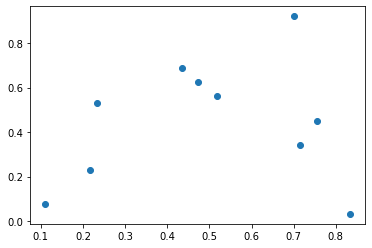

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1])

Dans `X` la première dimension représente le numéro du point et la deuxième dimension les coordonnées de ce point ($x_1$, $x_2$). 

Maintenant on calcule les `a` et `b` comme tout à l'heure. On ajoute une dimension pour créer un objet en 3 dimensions ($n1=10$, $n2=10$, $x$) à partir de $X$ qui était en dimensions $n=10$ et $x=2$. 

Par la somme ou la différence, on aura dans a[i, j, k] - b[i, j, k] = X[i, k] - X[j, k] 

In [11]:
a=X[:,np.newaxis]
b=a[np.newaxis,:,0]

In [18]:
a

array([[[0.51687912, 0.56260511]],

       [[0.43471293, 0.68701076]],

       [[0.21762854, 0.2280055 ]],

       [[0.47324313, 0.62622861]],

       [[0.75407177, 0.44772914]],

       [[0.71556783, 0.34107987]],

       [[0.11089626, 0.07658834]],

       [[0.23410107, 0.53025571]],

       [[0.83303193, 0.03249881]],

       [[0.70090266, 0.92037445]]])

In [19]:
b

array([[[0.51687912, 0.56260511],
        [0.43471293, 0.68701076],
        [0.21762854, 0.2280055 ],
        [0.47324313, 0.62622861],
        [0.75407177, 0.44772914],
        [0.71556783, 0.34107987],
        [0.11089626, 0.07658834],
        [0.23410107, 0.53025571],
        [0.83303193, 0.03249881],
        [0.70090266, 0.92037445]]])

In [13]:
a - b

array([[[ 0.        ,  0.        ],
        [ 0.08216619, -0.12440564],
        [ 0.29925058,  0.33459961],
        [ 0.04363599, -0.06362349],
        [-0.23719265,  0.11487598],
        [-0.1986887 ,  0.22152524],
        [ 0.40598286,  0.48601678],
        [ 0.28277805,  0.03234941],
        [-0.31615281,  0.53010631],
        [-0.18402354, -0.35776934]],

       [[-0.08216619,  0.12440564],
        [ 0.        ,  0.        ],
        [ 0.21708439,  0.45900526],
        [-0.0385302 ,  0.06078215],
        [-0.31935884,  0.23928162],
        [-0.2808549 ,  0.34593088],
        [ 0.32381667,  0.61042242],
        [ 0.20061186,  0.15675505],
        [-0.398319  ,  0.65451195],
        [-0.26618973, -0.2333637 ]],

       [[-0.29925058, -0.33459961],
        [-0.21708439, -0.45900526],
        [ 0.        ,  0.        ],
        [-0.25561459, -0.39822311],
        [-0.53644323, -0.21972364],
        [-0.49793928, -0.11307437],
        [ 0.10673228,  0.15141716],
        [-0.01647253, -0

On peut calculer la différence au carré pour chaque coordonnée. 

In [25]:
carre=(a-b)*(a-b)
carre

array([[[0.00000000e+00, 0.00000000e+00],
        [6.75128308e-03, 1.54767639e-02],
        [8.95509099e-02, 1.11956902e-01],
        [1.90409960e-03, 4.04794910e-03],
        [5.62603517e-02, 1.31964904e-02],
        [3.94772011e-02, 4.90734329e-02],
        [1.64822086e-01, 2.36212310e-01],
        [7.99634283e-02, 1.04648416e-03],
        [9.99525969e-02, 2.81012698e-01],
        [3.38646635e-02, 1.27998899e-01]],

       [[6.75128308e-03, 1.54767639e-02],
        [0.00000000e+00, 0.00000000e+00],
        [4.71256318e-02, 2.10685826e-01],
        [1.48457647e-03, 3.69446947e-03],
        [1.01990068e-01, 5.72556941e-02],
        [7.88794725e-02, 1.19668177e-01],
        [1.04857237e-01, 3.72615533e-01],
        [4.02451196e-02, 2.45721457e-02],
        [1.58658024e-01, 4.28385893e-01],
        [7.08569737e-02, 5.44586146e-02]],

       [[8.95509099e-02, 1.11956902e-01],
        [4.71256318e-02, 2.10685826e-01],
        [0.00000000e+00, 0.00000000e+00],
        [6.53388190e-02, 1.585

La distance au carré est la somme pour toutes ces coordonnées. Donc la somme sur la troisième composante. 

In [46]:
dist_carre2 = [[carre[:,i][:,0]+carre[:,i][:,1]] for i in range(10)]

In [51]:
dist_carre2

[[array([0.        , 0.02222805, 0.20150781, 0.00595205, 0.06945684,
         0.08855063, 0.4010344 , 0.08100991, 0.38096529, 0.16186356])],
 [array([0.02222805, 0.        , 0.25781146, 0.00517905, 0.15924576,
         0.19854765, 0.47747277, 0.06481727, 0.58704392, 0.12531559])],
 [array([0.20150781, 0.25781146, 0.        , 0.22392046, 0.33604981,
         0.26072934, 0.03431894, 0.09162653, 0.4169442 , 0.71292864])],
 [array([0.00595205, 0.00517905, 0.22392046, 0.        , 0.11072679,
         0.14003106, 0.43339969, 0.06639973, 0.48196306, 0.13835064])],
 [array([0.06945684, 0.15924576, 0.33604981, 0.11072679, 0.        ,
         0.01285662, 0.55142023, 0.27718017, 0.17865093, 0.22622055])],
 [array([0.08855063, 0.19854765, 0.26072934, 0.14003106, 0.01285662,
         0.        , 0.43558348, 0.26759774, 0.10902009, 0.33579728])],
 [array([0.4010344 , 0.47747277, 0.03431894, 0.43339969, 0.55142023,
         0.43558348, 0.        , 0.22099351, 0.52342381, 1.06008257])],
 [array([0.08

Quels 2 points les plus proches du point 0 ?  On peut utiliser `np.argsort` sur les distances au premier point... 

In [54]:
dist0=dist_carre2[0]

In [55]:
np.argsort(dist0)

array([[0, 3, 1, 4, 7, 5, 9, 2, 8, 6]])